In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgb

In [7]:
# piece class
class Piece:
    def __init__(self, color, form_1, form_2):
        self.color = color
        self.form_1 = form_1
        self.form_2 = form_2


def get_shape(form, rotation):
    if rotation == 0:
        return form

    if rotation == 2:
        result = []
        for row in range(len(form) - 1, -1, -1):
            result.append(form[row][::-1])
        return result

    row_range = None
    if rotation == 1:
        row_range = range(len(form) - 1, -1, -1)
    else:
        row_range = range(len(form))
    result = []
    for col in range(len(form[0])):
        result.append([form[row][col] for row in row_range])
    return result if rotation == 1 else result[::-1]


# form = [[1, 1, 1], [1, 0, 1]]
# rotation = 2
# print(get_shape(form, rotation))


def start_coords(shape, board):
    result = []
    for row in range(len(board) - len(shape) + 1):
        for col in range(len(board[0]) - len(shape[0]) + 1):
            result.append((row, col))
    return result


# shape = get_shape(blue_piece.form_1, 1)
# for coords in start_coords(shape, board):
#     print(coords)


def does_fit(shape, coords, board):
    start_row, start_col = coords[0], coords[1]
    for row in range(len(shape)):
        for col in range(len(shape[0])):
            if not shape[row][col]:
                continue
            if board[start_row + row][start_col + col]:
                return False
    return True


# shape = get_shape(blue_piece.form_1, 0)
# print(shape)
# print(does_fit(shape, (0, 0), board))


def add_to_board(piece, shape, coords, board):
    start_row, start_col = coords[0], coords[1]
    for row in range(len(shape)):
        for col in range(len(shape[0])):
            if not shape[row][col]:
                continue
            board[start_row + row][start_col + col] = piece.color


# shape = get_shape(blue_piece.form_1, 1)
# add_to_board(blue_piece, shape, (0, 1), board)
# for row in board:
#     print(row)


def remove_from_board(piece, shape, coords, board):
    start_row, start_col = coords[0], coords[1]
    for row in range(len(shape)):
        for col in range(len(shape[0])):
            if not shape[row][col]:
                continue
            board[start_row + row][start_col + col] = None


# shape = get_shape(blue_piece.form_1, 1)
# add_to_board(blue_piece, shape, (0, 1), board)
# for row in board:
#     print(row)
# print()
# remove_from_board(blue_piece, board)
# for row in board:
#     print(row)


def are_holes_present(board):
    for row in board:
        if None in row:
            return True
    return False


def print_grid(board):
    for row in board:
        print(row)
    print()


def solve(board, pieces):
    piece = pieces.pop()
    for form in (piece.form_1, piece.form_2):
        for rotation in (0, 1, 2, 3):
            shape = get_shape(form, rotation)
            for coords in start_coords(shape, board):
                if does_fit(shape, coords, board):
                    add_to_board(piece, shape, coords, board)

                    if not pieces:
                        if are_holes_present(board):
                            remove_from_board(piece, shape, coords, board)
                            continue
                        return board

                    result = solve(board, pieces)
                    if result:
                        return result
                    # config didn't work
                    remove_from_board(piece, shape, coords, board)
    pieces.append(piece)
    return False


dark_blue_piece = Piece("DB", [[1, 1, 1], [1, 0, 1]], [[0, 1, 0], [1, 1, 1]])
green_piece = Piece("GR", [[1, 1, 1], [1, 0, 1]], [[0, 0, 1], [1, 1, 1]])
dark_green_piece = Piece("DG", [[1, 1, 1], [1, 1, 0]], [[0, 1, 0], [1, 1, 1]])
yellow_piece = Piece("YE", [[1, 1, 1, 1], [0, 0, 1, 1]], [[1, 0, 0, 0], [1, 1, 1, 1]])
light_blue_piece = Piece(
    "LB", [[1, 1, 1, 1], [0, 1, 1, 0]], [[0, 0, 1, 0], [1, 1, 1, 1]]
)
purple_piece = Piece("PU", [[1, 1, 1], [0, 1, 1]], [[1, 0, 0], [1, 1, 1]])

orange_piece = Piece("OR", [[1, 1, 1, 1], [1, 0, 1, 0]], [[0, 0, 1, 0], [1, 1, 1, 1]])
blue_piece = Piece("BL", [[1, 1, 1, 1], [0, 1, 0, 1]], [[0, 0, 0, 1], [1, 1, 1, 1]])
red_piece = Piece("RE", [[1, 1, 1, 1], [1, 0, 0, 0]], [[1, 0, 0, 1], [1, 1, 1, 1]])
pink_piece = Piece("PI", [[1, 1, 1, 1], [1, 1, 0, 0]], [[0, 1, 0, 0], [1, 1, 1, 1]])




In [26]:
def show_grid(grid):
    # Map of codes → colors
    color_map = {
        'DB': 'navy',        # Dark Blue
        'DG': 'darkgreen',
        'OR': 'orange',
        'PI': 'pink',
        'GR': 'green',
        'BL': 'blue',
        'YE': 'yellow',
        'PU': 'purple',
        'RE': 'red',
        'LB': 'lightskyblue'
    }

    H, W = len(grid), len(grid[0])
    img = np.zeros((H, W, 3), dtype=float)

    # Fill the RGB image
    for i, row in enumerate(grid):
        for j, code in enumerate(row):
            if code is None:
                img[i, j] = (0, 0, 0)  # black for None
            else:
                img[i, j] = to_rgb(color_map.get(code, 'black'))

    # Plot once, after loops
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(img, origin='upper')

    # Optional gridlines
    ax.set_xticks(np.arange(-0.5, W, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, H, 1), minor=True)
    ax.grid(which='minor', linestyle='-', linewidth=1, color='white')

    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.tight_layout()
    plt.show()

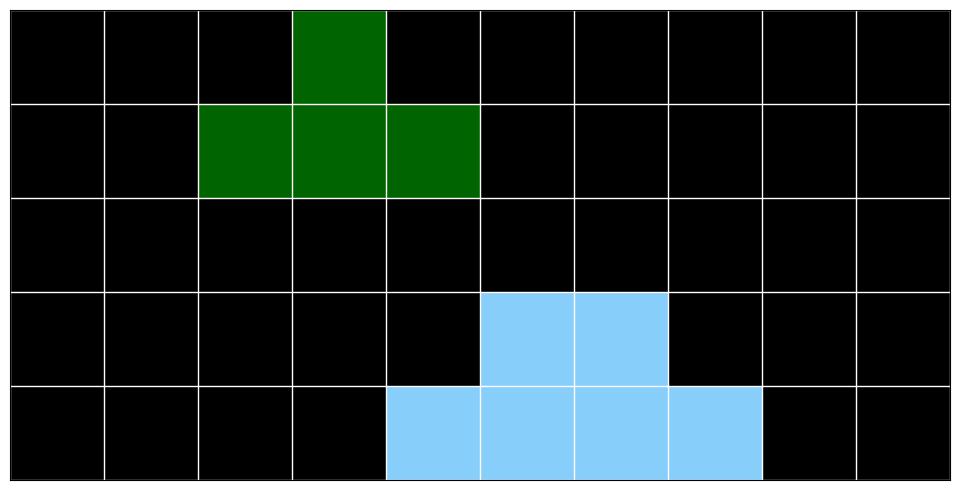

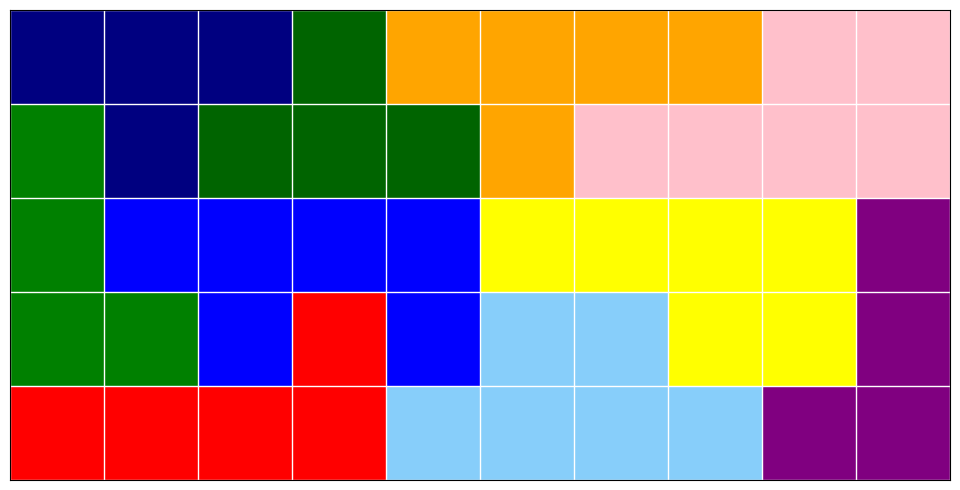

['DB', 'DB', 'DB', 'DG', 'OR', 'OR', 'OR', 'OR', 'PI', 'PI']
['GR', 'DB', 'DG', 'DG', 'DG', 'OR', 'PI', 'PI', 'PI', 'PI']
['GR', 'BL', 'BL', 'BL', 'BL', 'YE', 'YE', 'YE', 'YE', 'PU']
['GR', 'GR', 'BL', 'RE', 'BL', 'LB', 'LB', 'YE', 'YE', 'PU']
['RE', 'RE', 'RE', 'RE', 'LB', 'LB', 'LB', 'LB', 'PU', 'PU']



In [37]:
board = []
for row in range(5):
    board.append([None] * 10)
    
    
pieces = [
    dark_blue_piece,
    green_piece,
    dark_green_piece,
    yellow_piece,
    light_blue_piece,
    purple_piece,
    orange_piece,
    blue_piece,
    red_piece,
    pink_piece,
]

dark_green_shape = get_shape(dark_green_piece.form_2, 0)
light_blue_shape = get_shape(light_blue_piece.form_1, 2)

add_to_board(dark_green_piece, dark_green_shape, (0, 2), board)
add_to_board(light_blue_piece, light_blue_shape, (3, 4), board)

pieces.remove(dark_green_piece)
pieces.remove(light_blue_piece)


# blue_shape = get_shape(blue_piece.form_2, 2)
# orange_shape = get_shape(orange_piece.form_2, 1)

# add_to_board(blue_piece, blue_shape, (0, 1), board)
# add_to_board(orange_piece, orange_shape, (0, 0), board)

# pieces.remove(blue_piece)
# pieces.remove(orange_piece)

show_grid(board)

result = solve(board, pieces)

show_grid(result)
print_grid(result)

